In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label, find_objects
from skimage.measure import regionprops
import pandas as pd

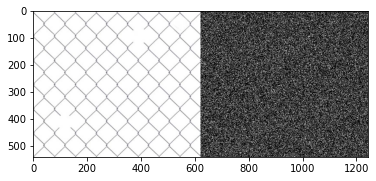

In [8]:
I = cv2.imread('fence.png')
G = cv2.imread('noiseSP.png')

res = np.concatenate((I, G), axis = 1)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

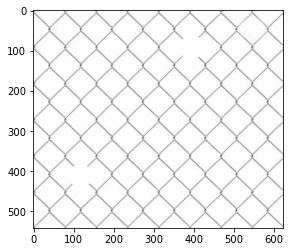

In [14]:
N = G + I
plt.imshow(cv2.cvtColor(N.astype(np.uint8), cv2.COLOR_BGR2RGB))

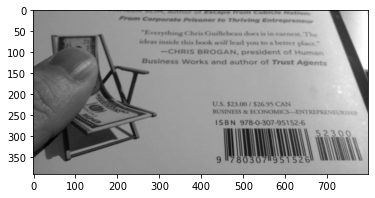

In [18]:
barCode = cv2.imread('barCodesDetection.png')

barCodeGray = cv2.cvtColor(barCode, cv2.COLOR_BGR2GRAY)
plt.imshow(barCodeGray, cmap='gray')

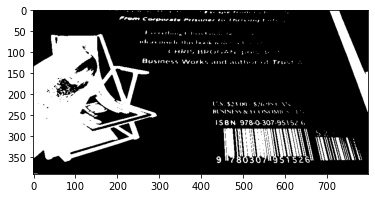

In [19]:
barCodeBin = barCodeGray < 120
plt.imshow(barCodeBin, cmap='gray')

In [48]:
structure = [[1,1,1], [1,1,1], [1,1,1]]
labeled_array, num_features = ndimage.label(barCodeBin, structure= structure)

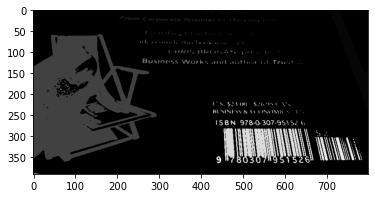

In [49]:
plt.imshow(labeled_array, cmap='gray')

In [59]:
regions = regionprops(labeled_array)

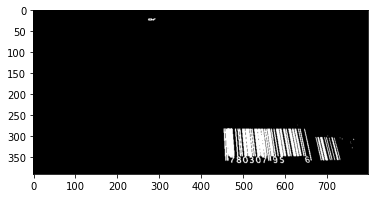

In [107]:
result = np.zeros(barCode.shape)

for i, props in enumerate (regions):
    if props.eccentricity > 0.8 and props.major_axis_length >= 20 and props.major_axis_length <= 120 and props.orientation < 0.38888888888:
        result[labeled_array == i] = 255
plt.imshow(result.astype(np.uint8), cmap='gray')